Use the *bayesian* method to estimate a white dwarf age 
=============================================

In this tutorial we are going to estimate the ages of two white dwarfs using the bayesian method. We are going to start by importing all the packages we are going to need

In [1]:
import sys
sys.path.append('/Users/rociokiman/Documents/wdwarfdate')
import wdwarfdate  
import numpy as np
import time

Now we set up the white dwarfs's effective temperatures and surface gravity obtained from Gentile Fusillo, N.P. et al. (2019).

In [2]:
#Define data for the white dwarf
teffs = np.array([19250,20250])
teffs_err = np.array([500,850])
loggs = np.array([8.16,8.526])
loggs_err = np.array([0.084,0.126])

Now we run the age estimation using the *bayesian* method and take the time it takes to run. We are going to explicitly indicate the models we wanted to use:

1) model_wd = 'DA', for type of white dwarf

2) model_ifmr = 'Cummings_2018_MIST', for the initial-to-final mass relation 

3) feh = 'p0.00' and vvcrit='0.0', for the isochrone of the progenitor star

These are the default models so we did not need to do it in this case, but we will write them down to be clear. 
We will also specify the high and low percentiles we want to use to calculate the errors for each parameter. With the data_type parameters we will select the units of the resulting ages to be Gyr. Finally we will select `plot=True` so we obtain the plots from the MCMC run and the distributions for each of the resulting parameters. We strongly recommend running the *bayesian* method with `plot=True`

Running teff:19250 logg:8.16


/Users/rociokiman/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3099: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  self.set_xlim(upper, lower, auto=None)


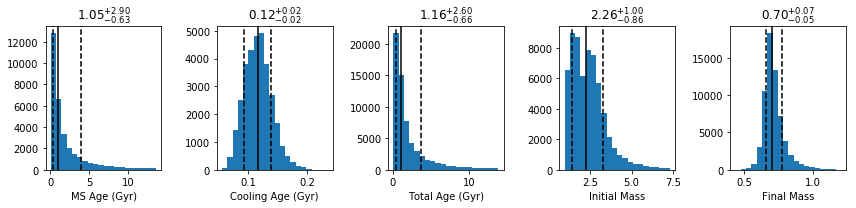

Running teff:20250 logg:8.526


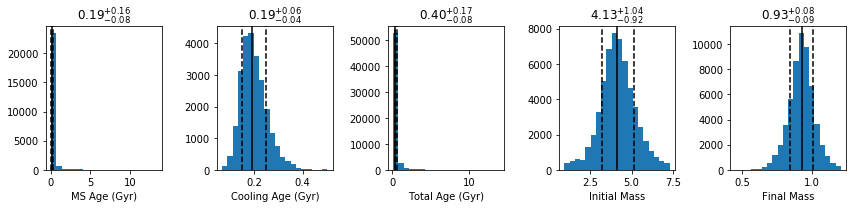

213.3895878791809s


In [3]:
start = time.time()
results = wdwarfdate.calc_wd_age(teffs,teffs_err,loggs,loggs_err,
                                 method='bayesian',
                                 model_wd='DA',feh='p0.00',vvcrit='0.0',
                                 model_ifmr = 'Cummings_2018_MIST', 
                                 high_perc = 84, low_perc = 16,
                                 datatype='Gyr',
                                 plot=True,nburn_in = 100,n_calc_auto_corr = 100,
                                 n_indep_samples = 100)
end = time.time()
print('{}s'.format(end - start))